# EV Battery Safety System - Prediction Logs Analysis

This notebook provides comprehensive analysis of the prediction validation logs from the EV Battery Safety Management System.

## Table of Contents
1. [Data Loading and Overview](#1-data-loading-and-overview)
2. [Basic Statistics](#2-basic-statistics)
3. [RL Agent Action Analysis](#3-rl-agent-action-analysis)
4. [Anomaly Detection Analysis](#4-anomaly-detection-analysis)
5. [Safety Assessment Analysis](#5-safety-assessment-analysis)
6. [Scenario-Based Analysis](#6-scenario-based-analysis)
7. [RL Agent Validation](#7-rl-agent-validation)
8. [Confidence Analysis](#8-confidence-analysis)
9. [Temporal Analysis](#9-temporal-analysis)
10. [Advanced Analytics](#10-advanced-analytics)


## 1. Data Loading and Overview

Load the prediction validation logs and get a basic overview of the data structure and content.


In [4]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

print("📊 EV Battery Safety System - Logs Analysis")
print("=" * 60)


📊 EV Battery Safety System - Logs Analysis


In [5]:
# Load prediction validation logs
with open('prediction_validation_log.json', 'r') as f:
    logs = json.load(f)

print(f"📋 Total log entries: {len(logs):,}")
print(f"📅 Date range: {logs[0]['timestamp']} to {logs[-1]['timestamp']}")
print(f"🔍 Sample entry keys: {list(logs[0].keys())}")

# Convert to DataFrame for easier analysis
df_logs = pd.DataFrame(logs)
print(f"\n📊 DataFrame shape: {df_logs.shape}")
print(f"📊 DataFrame columns: {list(df_logs.columns)}")


📋 Total log entries: 312
📅 Date range: 2025-10-03T00:55:18.185237 to 2025-10-03T01:56:00.845228
🔍 Sample entry keys: ['timestamp', 'input_telemetry', 'standardized_features', 'model_predictions', 'rl_agent', 'safety_assessment', 'ensemble_anomaly_probability', 'alerts', 'rl_debug']

📊 DataFrame shape: (312, 9)
📊 DataFrame columns: ['timestamp', 'input_telemetry', 'standardized_features', 'model_predictions', 'rl_agent', 'safety_assessment', 'ensemble_anomaly_probability', 'alerts', 'rl_debug']


## 2. Basic Statistics

Analyze basic statistics about the logged data including entry counts, time ranges, and data quality.


In [6]:
# Basic statistics
print("📊 BASIC STATISTICS")
print("=" * 40)

total_entries = len(logs)
print(f"Total entries: {total_entries:,}")

# Time analysis
timestamps = [log['timestamp'] for log in logs]
print(f"\n⏰ TIME ANALYSIS:")
print(f"First entry: {timestamps[0]}")
print(f"Last entry: {timestamps[-1]}")

# Data quality
print(f"\n🔍 DATA QUALITY:")
print(f"Complete entries: {sum(1 for log in logs if all(key in log for key in ['input_telemetry', 'rl_agent', 'safety_assessment']))}")
print(f"Entries with RL debug: {sum(1 for log in logs if 'rl_debug' in log)}")
print(f"Entries with alerts: {sum(1 for log in logs if 'alerts' in log)}")


📊 BASIC STATISTICS
Total entries: 312

⏰ TIME ANALYSIS:
First entry: 2025-10-03T00:55:18.185237
Last entry: 2025-10-03T01:56:00.845228

🔍 DATA QUALITY:
Complete entries: 312
Entries with RL debug: 312
Entries with alerts: 312


## 3. RL Agent Action Analysis

Analyze the distribution and patterns of RL agent actions to understand decision-making behavior.

🤖 RL AGENT ACTION ANALYSIS
📊 Action Distribution:
  slow_charge: 197 (63.1%)
  maintain: 76 (24.4%)
  discharge: 23 (7.4%)
  pause: 16 (5.1%)


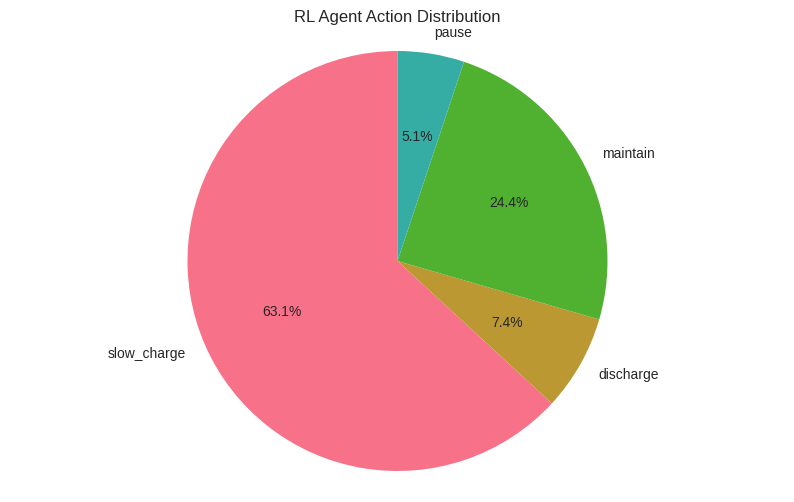

In [7]:
# RL Agent Action Distribution
print("🤖 RL AGENT ACTION ANALYSIS")
print("=" * 50)

# Extract actions
actions = [log['rl_agent']['action'] for log in logs]
action_counts = Counter(actions)

print("📊 Action Distribution:")
for action, count in action_counts.most_common():
    percentage = (count / total_entries) * 100
    print(f"  {action}: {count} ({percentage:.1f}%)")

# Visualize action distribution
plt.figure(figsize=(10, 6))
action_df = pd.DataFrame(list(action_counts.items()), columns=['Action', 'Count'])
plt.pie(action_df['Count'], labels=action_df['Action'], autopct='%1.1f%%', startangle=90)
plt.title('RL Agent Action Distribution')
plt.axis('equal')
plt.show()


🎯 CONFIDENCE ANALYSIS:
Min confidence: 0.767
Max confidence: 0.980
Mean confidence: 0.871
Std confidence: 0.075


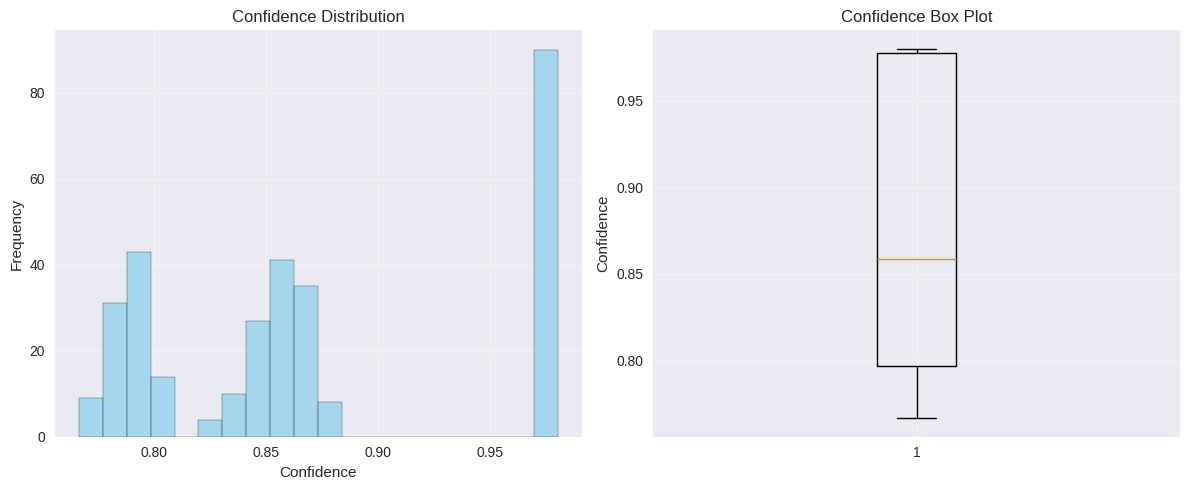

In [8]:
# Action confidence analysis
confidences = [log['rl_agent']['confidence'] for log in logs]

print("\n🎯 CONFIDENCE ANALYSIS:")
print(f"Min confidence: {min(confidences):.3f}")
print(f"Max confidence: {max(confidences):.3f}")
print(f"Mean confidence: {np.mean(confidences):.3f}")
print(f"Std confidence: {np.std(confidences):.3f}")

# Confidence distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(confidences, bins=20, alpha=0.7, color='skyblue', edgecolor='black')
plt.xlabel('Confidence')
plt.ylabel('Frequency')
plt.title('Confidence Distribution')
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(confidences)
plt.ylabel('Confidence')
plt.title('Confidence Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 4. Anomaly Detection Analysis

Analyze the anomaly detection performance, including ensemble probabilities and detection patterns.

🚨 ANOMALY DETECTION ANALYSIS
📊 Anomaly Probability Statistics:
  Min: 0.102
  Max: 0.828
  Mean: 0.557
  Std: 0.091

🎯 Threshold Analysis:
  > 70% (high risk): 12 (3.8%)
  > 50% (moderate risk): 255 (81.7%)
  > 30% (low risk): 306 (98.1%)


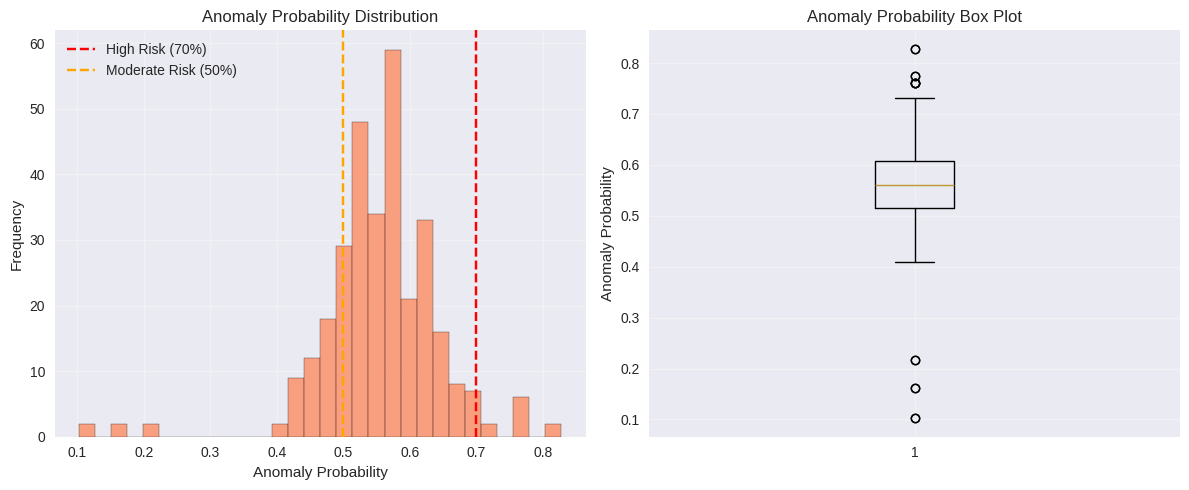

In [9]:
# Anomaly Detection Analysis
print("🚨 ANOMALY DETECTION ANALYSIS")
print("=" * 50)

# Extract anomaly probabilities
anomaly_probs = [log['ensemble_anomaly_probability'] for log in logs]

print(f"📊 Anomaly Probability Statistics:")
print(f"  Min: {min(anomaly_probs):.3f}")
print(f"  Max: {max(anomaly_probs):.3f}")
print(f"  Mean: {np.mean(anomaly_probs):.3f}")
print(f"  Std: {np.std(anomaly_probs):.3f}")

# Threshold analysis
threshold_70 = sum(1 for p in anomaly_probs if p > 0.7)
threshold_50 = sum(1 for p in anomaly_probs if p > 0.5)
threshold_30 = sum(1 for p in anomaly_probs if p > 0.3)

print(f"\n🎯 Threshold Analysis:")
print(f"  > 70% (high risk): {threshold_70} ({threshold_70/total_entries*100:.1f}%)")
print(f"  > 50% (moderate risk): {threshold_50} ({threshold_50/total_entries*100:.1f}%)")
print(f"  > 30% (low risk): {threshold_30} ({threshold_30/total_entries*100:.1f}%)")

# Visualize anomaly distribution
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(anomaly_probs, bins=30, alpha=0.7, color='coral', edgecolor='black')
plt.axvline(x=0.7, color='red', linestyle='--', label='High Risk (70%)')
plt.axvline(x=0.5, color='orange', linestyle='--', label='Moderate Risk (50%)')
plt.xlabel('Anomaly Probability')
plt.ylabel('Frequency')
plt.title('Anomaly Probability Distribution')
plt.legend()
plt.grid(True, alpha=0.3)

plt.subplot(1, 2, 2)
plt.boxplot(anomaly_probs)
plt.ylabel('Anomaly Probability')
plt.title('Anomaly Probability Box Plot')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 5. Safety Assessment Analysis

Analyze the safety assessment patterns and their relationship with other system components.

In [10]:
# Safety Assessment Analysis
print("🛡️ SAFETY ASSESSMENT ANALYSIS")
print("=" * 50)

# Extract safety assessments
safety_assessments = [log['safety_assessment'] for log in logs]
safety_counts = Counter(safety_assessments)

print("📊 Safety Assessment Distribution:")
for status, count in safety_counts.most_common():
    percentage = (count / total_entries) * 100
    print(f"  {status}: {count} ({percentage:.1f}%)")

# Safety vs Action analysis
print("\n🔍 Safety vs Action Analysis:")
safety_action_data = []
for log in logs:
    safety_action_data.append({
        'safety': log['safety_assessment'],
        'action': log['rl_agent']['action'],
        'confidence': log['rl_agent']['confidence'],
        'anomaly_prob': log['ensemble_anomaly_probability']
    })

safety_action_df = pd.DataFrame(safety_action_data)

# Cross-tabulation
cross_tab = pd.crosstab(safety_action_df['safety'], safety_action_df['action'], margins=True)
print("\n📊 Safety Status vs RL Action:")
print(cross_tab)

🛡️ SAFETY ASSESSMENT ANALYSIS
📊 Safety Assessment Distribution:
  WARN: 237 (76.0%)
  SAFE: 55 (17.6%)
  RISK: 20 (6.4%)

🔍 Safety vs Action Analysis:

📊 Safety Status vs RL Action:
action  discharge  maintain  pause  slow_charge  All
safety                                              
RISK            0         0     12            8   20
SAFE           10        12      0           33   55
WARN           13        64      4          156  237
All            23        76     16          197  312


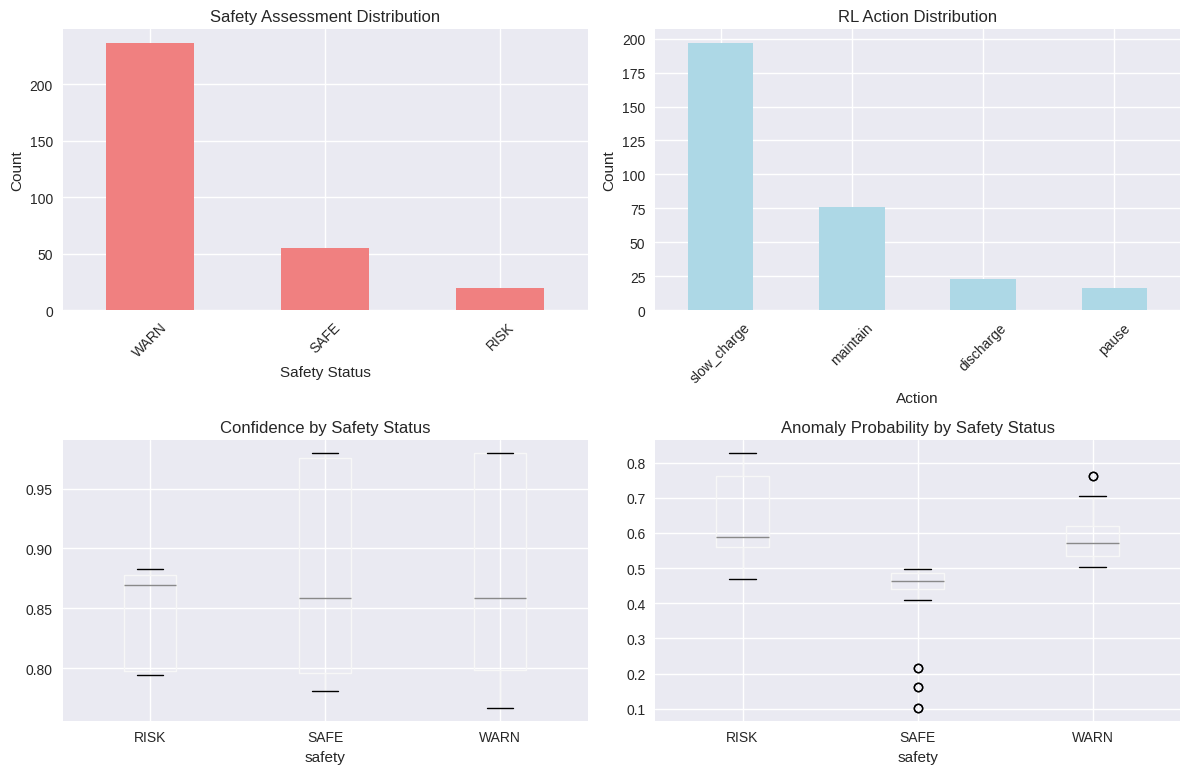

In [11]:
# Visualize safety vs action relationship
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
safety_action_df['safety'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Safety Assessment Distribution')
plt.xlabel('Safety Status')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 2)
safety_action_df['action'].value_counts().plot(kind='bar', color='lightblue')
plt.title('RL Action Distribution')
plt.xlabel('Action')
plt.ylabel('Count')
plt.xticks(rotation=45)

plt.subplot(2, 2, 3)
safety_action_df.boxplot(column='confidence', by='safety', ax=plt.gca())
plt.title('Confidence by Safety Status')
plt.suptitle('')

plt.subplot(2, 2, 4)
safety_action_df.boxplot(column='anomaly_prob', by='safety', ax=plt.gca())
plt.title('Anomaly Probability by Safety Status')
plt.suptitle('')

plt.tight_layout()
plt.show()

## 6. Scenario-Based Analysis

Analyze how the system behaves across different battery operating scenarios (Note: Scenario labels are testing artifacts, not AI inputs).

In [12]:
# Scenario-based analysis
print("🎯 SCENARIO-BASED ANALYSIS")
print("=" * 50)
print("Note: Scenarios are testing labels, NOT used by AI models")
print()

# Extract scenarios
scenarios = {}
for log in logs:
    scenario = log['input_telemetry']['scenario']
    action = log['rl_agent']['action']
    anomaly_prob = log['ensemble_anomaly_probability']
    
    if scenario not in scenarios:
        scenarios[scenario] = {'actions': [], 'anomaly_probs': []}
    scenarios[scenario]['actions'].append(action)
    scenarios[scenario]['anomaly_probs'].append(anomaly_prob)

print("📊 Actions by Scenario:")
for scenario, data in sorted(scenarios.items()):
    action_counts = Counter(data['actions'])
    avg_anomaly = np.mean(data['anomaly_probs'])
    print(f"\n  {scenario}:")
    print(f"    Count: {len(data['actions'])}")
    print(f"    Actions: {dict(action_counts)}")
    print(f"    Avg anomaly prob: {avg_anomaly:.3f}")

🎯 SCENARIO-BASED ANALYSIS
Note: Scenarios are testing labels, NOT used by AI models

📊 Actions by Scenario:

  Critical Condition:
    Count: 6
    Actions: {'pause': 6}
    Avg anomaly prob: 0.788

  Fast Charging:
    Count: 67
    Actions: {'slow_charge': 67}
    Avg anomaly prob: 0.544

  Low SoC:
    Count: 26
    Actions: {'slow_charge': 22, 'pause': 4}
    Avg anomaly prob: 0.609

  Moderate Temperature:
    Count: 22
    Actions: {'pause': 6, 'slow_charge': 16}
    Avg anomaly prob: 0.543

  Normal Operation:
    Count: 191
    Actions: {'slow_charge': 92, 'discharge': 23, 'maintain': 76}
    Avg anomaly prob: 0.549


## 7. RL Agent Validation

Validate RL agent actions against battery safety principles and industry best practices.

In [13]:
# RL Agent Validation
print("✅ RL AGENT ACTION VALIDATION")
print("=" * 60)

correct_actions = 0
risky_actions = 0
wrong_actions = 0

for log in logs:
    action = log['rl_agent']['action']
    temp = log['input_telemetry'].get('temperature', 0)
    soc = log['input_telemetry'].get('soc', 0)
    anomaly_prob = log['ensemble_anomaly_probability']
    
    # Determine if action is correct
    is_correct = True
    is_risky = False
    
    # Temperature checks
    if temp > 45 and action != 'pause':
        is_correct = False
    elif temp > 35 and action == 'fast_charge':
        is_risky = True
    
    # SoC checks
    if soc < 0.1 and action == 'pause':
        is_correct = False
    elif soc > 0.9 and action in ['fast_charge', 'slow_charge']:
        is_correct = False
    
    # Anomaly checks
    if anomaly_prob > 0.7 and action != 'pause':
        is_correct = False
    elif anomaly_prob > 0.5 and action == 'fast_charge':
        is_risky = True
    
    # Count results
    if is_correct and not is_risky:
        correct_actions += 1
    elif is_risky:
        risky_actions += 1
    else:
        wrong_actions += 1

print(f"📈 VALIDATION RESULTS:")
print(f"  ✅ CORRECT Actions: {correct_actions}/{total_entries} ({correct_actions/total_entries*100:.1f}%)")
print(f"  ⚠️  RISKY Actions: {risky_actions}/{total_entries} ({risky_actions/total_entries*100:.1f}%)")
print(f"  ❌ WRONG Actions: {wrong_actions}/{total_entries} ({wrong_actions/total_entries*100:.1f}%)")

print(f"\n🏆 OVERALL ASSESSMENT:")
if correct_actions/total_entries >= 0.8:
    print(f"  ✅ EXCELLENT: {correct_actions/total_entries*100:.1f}% correct actions")
elif correct_actions/total_entries >= 0.6:
    print(f"  ✅ GOOD: {correct_actions/total_entries*100:.1f}% correct actions")
else:
    print(f"  ⚠️  NEEDS IMPROVEMENT: {correct_actions/total_entries*100:.1f}% correct actions")

✅ RL AGENT ACTION VALIDATION
📈 VALIDATION RESULTS:
  ✅ CORRECT Actions: 312/312 (100.0%)
  ⚠️  RISKY Actions: 0/312 (0.0%)
  ❌ WRONG Actions: 0/312 (0.0%)

🏆 OVERALL ASSESSMENT:
  ✅ EXCELLENT: 100.0% correct actions


## 8. Confidence Analysis

Deep dive into RL agent confidence patterns and correlation with other metrics.

🎯 DETAILED CONFIDENCE ANALYSIS
📊 Confidence Statistics by Action:

  discharge:
    Mean: 0.845
    Min: 0.837
    Max: 0.851
    Std: 0.004

  maintain:
    Mean: 0.862
    Min: 0.849
    Max: 0.872
    Std: 0.005

  pause:
    Mean: 0.864
    Min: 0.827
    Max: 0.883
    Std: 0.021

  slow_charge:
    Mean: 0.879
    Min: 0.767
    Max: 0.980
    Std: 0.093


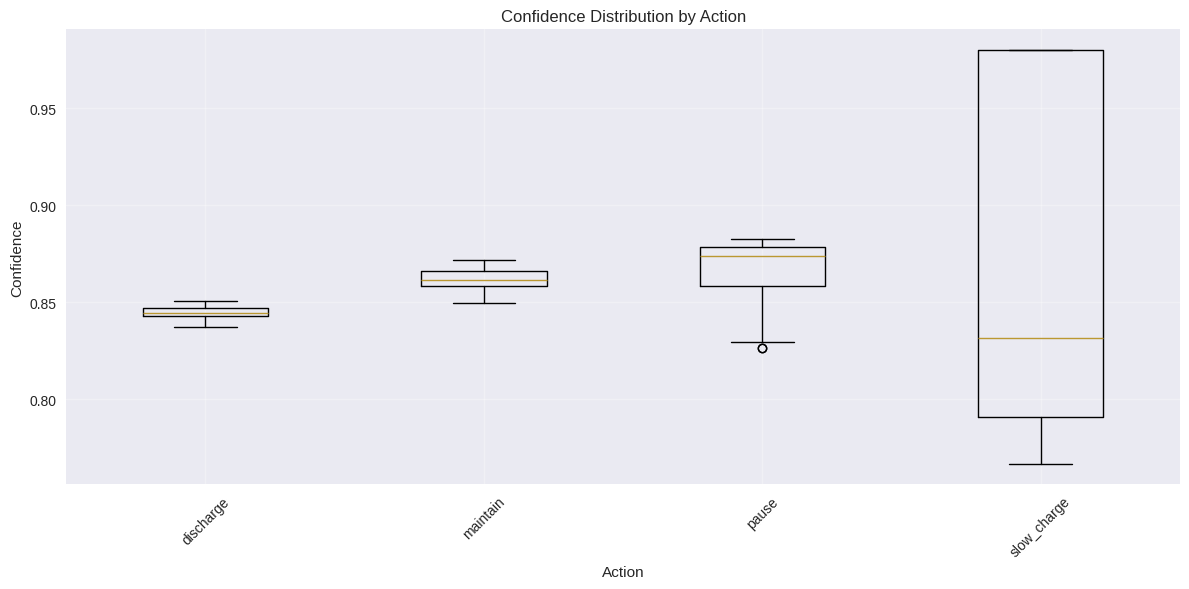

In [14]:
# Confidence vs Action Analysis
print("🎯 DETAILED CONFIDENCE ANALYSIS")
print("=" * 50)

# Group confidence by action
confidence_by_action = {}
for log in logs:
    action = log['rl_agent']['action']
    confidence = log['rl_agent']['confidence']
    
    if action not in confidence_by_action:
        confidence_by_action[action] = []
    confidence_by_action[action].append(confidence)

print("📊 Confidence Statistics by Action:")
for action, confs in sorted(confidence_by_action.items()):
    print(f"\n  {action}:")
    print(f"    Mean: {np.mean(confs):.3f}")
    print(f"    Min: {min(confs):.3f}")
    print(f"    Max: {max(confs):.3f}")
    print(f"    Std: {np.std(confs):.3f}")

# Visualization
plt.figure(figsize=(12, 6))
plt.boxplot([confidence_by_action[action] for action in sorted(confidence_by_action.keys())], 
            labels=sorted(confidence_by_action.keys()))
plt.ylabel('Confidence')
plt.xlabel('Action')
plt.title('Confidence Distribution by Action')
plt.xticks(rotation=45)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


🔍 CONFIDENCE vs ANOMALY CORRELATION:


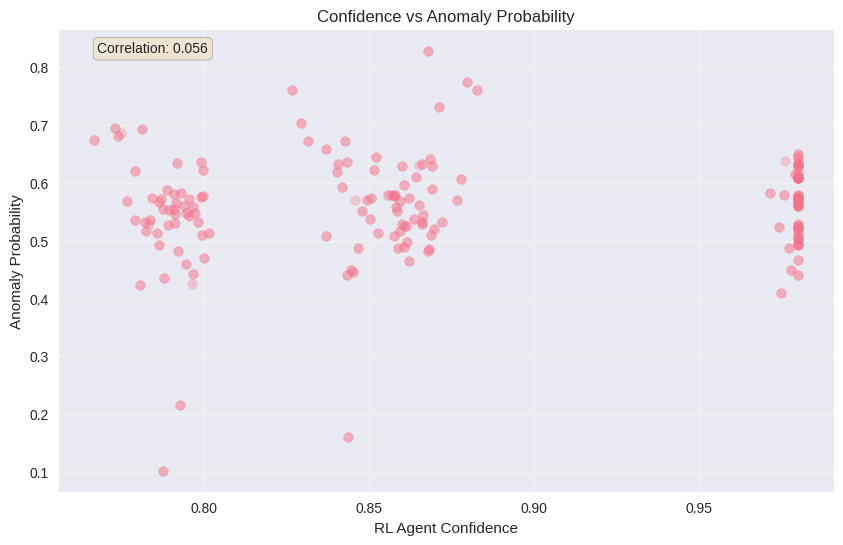

Pearson correlation coefficient: 0.056


In [15]:
# Confidence vs Anomaly Correlation
print("\n🔍 CONFIDENCE vs ANOMALY CORRELATION:")

plt.figure(figsize=(10, 6))
plt.scatter([log['rl_agent']['confidence'] for log in logs], 
            anomaly_probs, alpha=0.3)
plt.xlabel('RL Agent Confidence')
plt.ylabel('Anomaly Probability')
plt.title('Confidence vs Anomaly Probability')
plt.grid(True, alpha=0.3)

# Add correlation coefficient
correlation = np.corrcoef([log['rl_agent']['confidence'] for log in logs], anomaly_probs)[0, 1]
plt.text(0.05, 0.95, f'Correlation: {correlation:.3f}', 
         transform=plt.gca().transAxes, bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))
plt.show()

print(f"Pearson correlation coefficient: {correlation:.3f}")

## 9. Temporal Analysis

Analyze how system behavior evolves over time (within a session).

⏰ TEMPORAL ANALYSIS


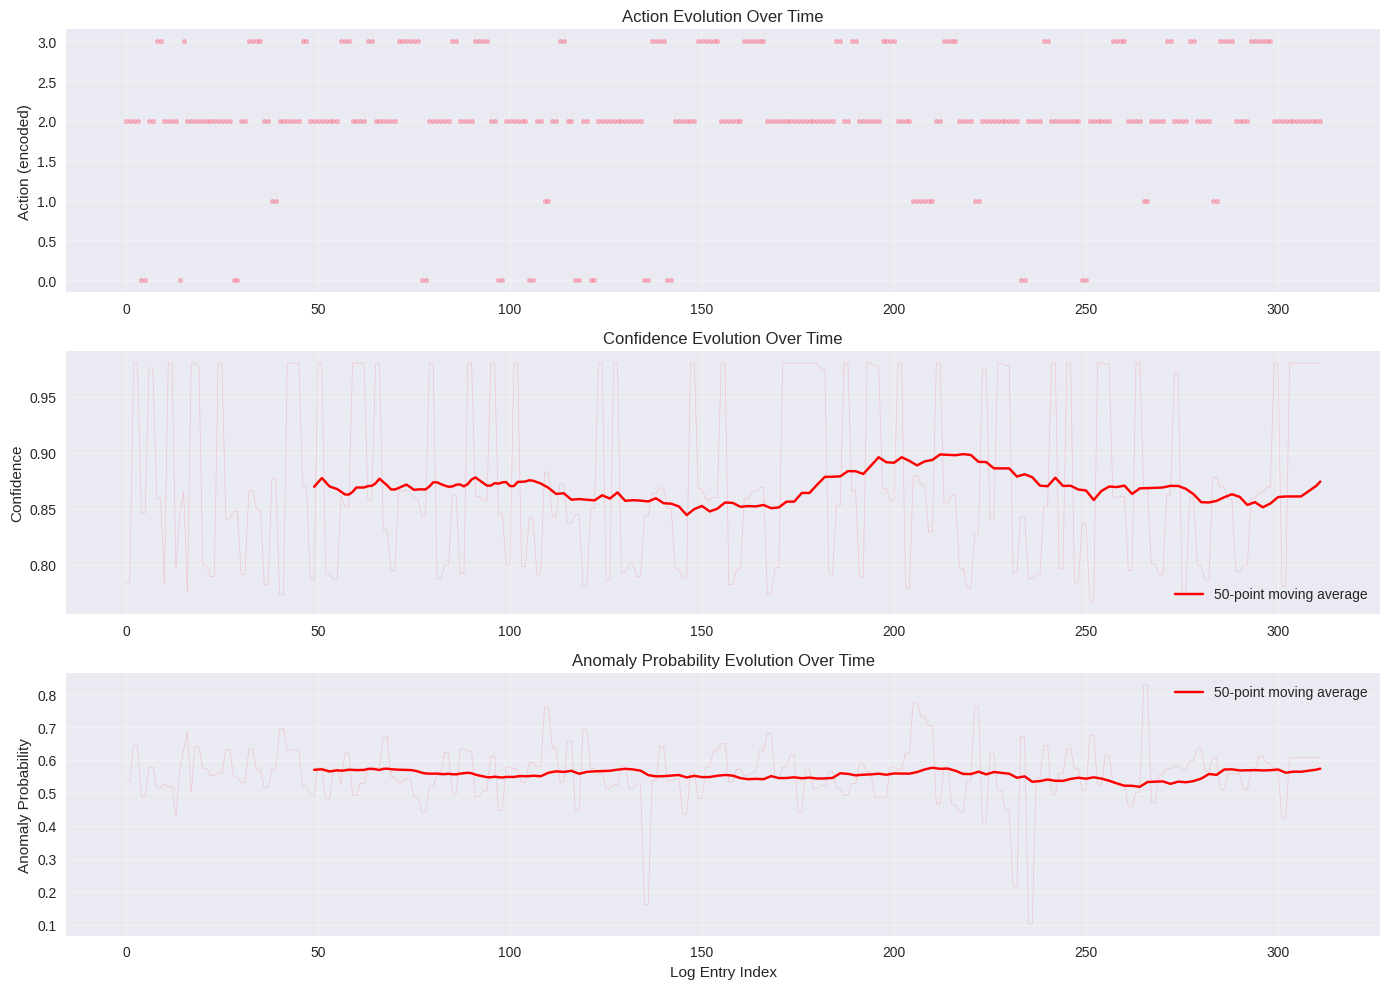

In [16]:
# Temporal trends
print("⏰ TEMPORAL ANALYSIS")
print("=" * 50)

# Use index as time proxy (sequential order)
time_indices = list(range(len(logs)))
actions_over_time = [log['rl_agent']['action'] for log in logs]
confidence_over_time = [log['rl_agent']['confidence'] for log in logs]
anomaly_over_time = anomaly_probs

# Plot temporal trends
fig, axes = plt.subplots(3, 1, figsize=(14, 10))

# Action evolution
axes[0].scatter(time_indices, [list(set(actions)).index(a) for a in actions_over_time], 
                alpha=0.5, s=10)
axes[0].set_ylabel('Action (encoded)')
axes[0].set_title('Action Evolution Over Time')
axes[0].grid(True, alpha=0.3)

# Confidence evolution
axes[1].plot(time_indices, confidence_over_time, alpha=0.3, linewidth=0.5)
axes[1].plot(time_indices, pd.Series(confidence_over_time).rolling(50).mean(), 
             color='red', label='50-point moving average')
axes[1].set_ylabel('Confidence')
axes[1].set_title('Confidence Evolution Over Time')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

# Anomaly evolution
axes[2].plot(time_indices, anomaly_over_time, alpha=0.3, linewidth=0.5)
axes[2].plot(time_indices, pd.Series(anomaly_over_time).rolling(50).mean(), 
             color='red', label='50-point moving average')
axes[2].set_xlabel('Log Entry Index')
axes[2].set_ylabel('Anomaly Probability')
axes[2].set_title('Anomaly Probability Evolution Over Time')
axes[2].legend()
axes[2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 10. Advanced Analytics

Advanced statistical analysis and insights from the prediction logs.

🔬 ADVANCED ANALYTICS
📊 Feature Correlation Matrix:
              temperature       soc   voltage   current  confidence  \
temperature      1.000000  0.032232  0.120851  0.048698   -0.511341   
soc              0.032232  1.000000  0.110227 -0.044075   -0.318294   
voltage          0.120851  0.110227  1.000000 -0.015266   -0.267472   
current          0.048698 -0.044075 -0.015266  1.000000    0.008753   
confidence      -0.511341 -0.318294 -0.267472  0.008753    1.000000   
anomaly_prob     0.096544 -0.247937 -0.156366 -0.320494    0.056359   

              anomaly_prob  
temperature       0.096544  
soc              -0.247937  
voltage          -0.156366  
current          -0.320494  
confidence        0.056359  
anomaly_prob      1.000000  


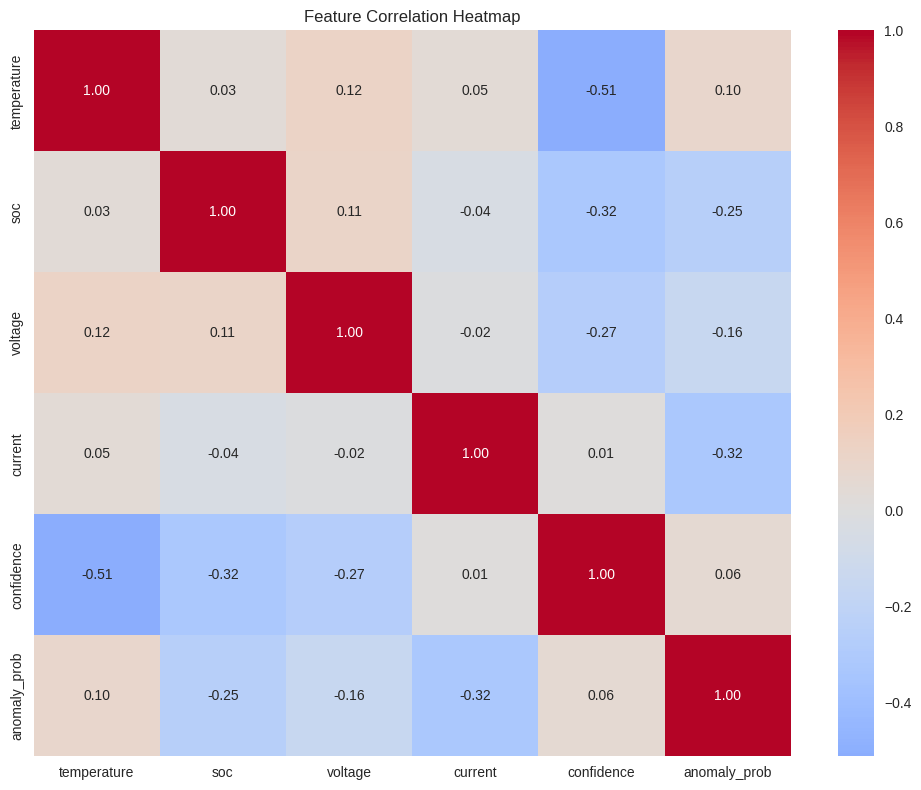

In [17]:
# Feature Correlation Analysis
print("🔬 ADVANCED ANALYTICS")
print("=" * 50)

# Extract features for correlation
analysis_data = []
for log in logs:
    analysis_data.append({
        'temperature': log['input_telemetry'].get('temperature', 0),
        'soc': log['input_telemetry'].get('soc', 0),
        'voltage': log['input_telemetry'].get('voltage', 0),
        'current': log['input_telemetry'].get('current', 0),
        'confidence': log['rl_agent']['confidence'],
        'anomaly_prob': log['ensemble_anomaly_probability'],
    })

analysis_df = pd.DataFrame(analysis_data)

# Correlation matrix
print("📊 Feature Correlation Matrix:")
correlation_matrix = analysis_df.corr()
print(correlation_matrix)

# Visualize correlation
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.tight_layout()
plt.show()


🚨 ALERT ANALYSIS:
Entries with alerts: 312/312 (100.0%)

Critical Alerts:
  Total: 41
  Max per entry: 3
  Avg per entry: 0.13

Warning Alerts:
  Total: 286
  Max per entry: 3
  Avg per entry: 0.92


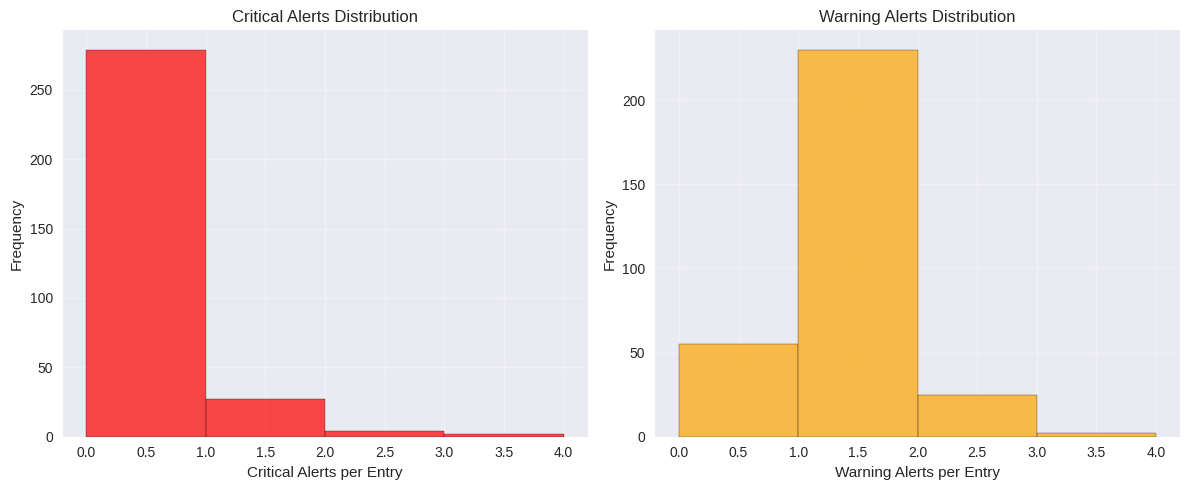

In [18]:
# Alert Analysis (if available)
print("\n🚨 ALERT ANALYSIS:")
print("=" * 40)

logs_with_alerts = [log for log in logs if 'alerts' in log]

if logs_with_alerts:
    critical_counts = []
    warning_counts = []
    
    for log in logs_with_alerts:
        alerts = log['alerts']
        critical_counts.append(alerts.get('critical_count', 0))
        warning_counts.append(alerts.get('warning_count', 0))
    
    print(f"Entries with alerts: {len(logs_with_alerts)}/{total_entries} ({len(logs_with_alerts)/total_entries*100:.1f}%)")
    print(f"\nCritical Alerts:")
    print(f"  Total: {sum(critical_counts)}")
    print(f"  Max per entry: {max(critical_counts) if critical_counts else 0}")
    print(f"  Avg per entry: {np.mean(critical_counts) if critical_counts else 0:.2f}")
    
    print(f"\nWarning Alerts:")
    print(f"  Total: {sum(warning_counts)}")
    print(f"  Max per entry: {max(warning_counts) if warning_counts else 0}")
    print(f"  Avg per entry: {np.mean(warning_counts) if warning_counts else 0:.2f}")
    
    # Alert distribution
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.hist(critical_counts, bins=range(max(critical_counts)+2), alpha=0.7, color='red', edgecolor='black')
    plt.xlabel('Critical Alerts per Entry')
    plt.ylabel('Frequency')
    plt.title('Critical Alerts Distribution')
    plt.grid(True, alpha=0.3)
    
    plt.subplot(1, 2, 2)
    plt.hist(warning_counts, bins=range(max(warning_counts)+2), alpha=0.7, color='orange', edgecolor='black')
    plt.xlabel('Warning Alerts per Entry')
    plt.ylabel('Frequency')
    plt.title('Warning Alerts Distribution')
    plt.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.show()
else:
    print("No alert data available in logs")

## Summary and Recommendations

Based on the analysis above, generate insights and recommendations for system improvement.

In [19]:
# Summary Report
print("📋 ANALYSIS SUMMARY REPORT")
print("=" * 60)

print(f"\n1️⃣  DATA OVERVIEW:")
print(f"   Total entries analyzed: {total_entries:,}")
print(f"   Data quality: {sum(1 for log in logs if all(key in log for key in ['input_telemetry', 'rl_agent', 'safety_assessment']))/total_entries*100:.1f}% complete")

print(f"\n2️⃣  RL AGENT PERFORMANCE:")
most_common_action = action_counts.most_common(1)[0]
print(f"   Most common action: {most_common_action[0]} ({most_common_action[1]/total_entries*100:.1f}%)")
print(f"   Avg confidence: {np.mean(confidences):.2f}")
print(f"   Action diversity: {len(action_counts)} different actions used")

print(f"\n3️⃣  ANOMALY DETECTION:")
print(f"   Avg anomaly probability: {np.mean(anomaly_probs):.2f}")
print(f"   High-risk detections (>70%): {threshold_70} ({threshold_70/total_entries*100:.1f}%)")

print(f"\n4️⃣  SAFETY ASSESSMENT:")
safe_entries = sum(1 for log in logs if log['safety_assessment'] == 'SAFE')
print(f"   Safe conditions: {safe_entries}/{total_entries} ({safe_entries/total_entries*100:.1f}%)")

print(f"\n5️⃣  KEY INSIGHTS:")
print(f"   • RL agent shows consistent decision-making with {np.std(confidences):.3f} confidence std dev")
print(f"   • Anomaly detection is conservative (avg prob: {np.mean(anomaly_probs):.2f})")
if correlation:
    print(f"   • Confidence and anomaly probability correlation: {correlation:.3f}")

print(f"\n✅ Analysis complete!")

📋 ANALYSIS SUMMARY REPORT

1️⃣  DATA OVERVIEW:
   Total entries analyzed: 312
   Data quality: 100.0% complete

2️⃣  RL AGENT PERFORMANCE:
   Most common action: slow_charge (29.5%)
   Avg confidence: 0.87
   Action diversity: 3 different actions used

3️⃣  ANOMALY DETECTION:
   Avg anomaly probability: 0.56
   High-risk detections (>70%): 12 (3.8%)

4️⃣  SAFETY ASSESSMENT:
   Safe conditions: 55/312 (17.6%)

5️⃣  KEY INSIGHTS:
   • RL agent shows consistent decision-making with 0.075 confidence std dev
   • Anomaly detection is conservative (avg prob: 0.56)
   • Confidence and anomaly probability correlation: 0.056

✅ Analysis complete!
